In [2]:
%cd cv/project/Card-detection/notebooks

/home/work/cv/project/Card-detection/notebooks


In [1]:
# pip install torch torchvision torchaudio

In [1]:
import numpy as np
import cv2
import IPython
from IPython.display import clear_output

import sys 
import os
sys.path.append(os.path.abspath("../"))
from module.Segmentor import Segmentor2
from module.Classifier import Classifier2

import time

In [2]:
filename = '../assets/test.mp4'

inputStream = cv2.VideoCapture(filename)

FPS = int(24)
inputWidth = int(inputStream.get(cv2.CAP_PROP_FRAME_WIDTH))
inputHeight = int(inputStream.get(cv2.CAP_PROP_FRAME_HEIGHT))

outputStream = cv2.VideoWriter('test-results-tt.avi',
                               #cv2.VideoWriter_fourcc('x', '2', '6', '4'),
                               cv2.VideoWriter_fourcc(*"FMP4"),
                                #-1,
                               FPS, (inputWidth, inputHeight))

                               
print('ho')
segmentor = Segmentor2()
classifer = Classifier2()
while inputStream.isOpened():
    print('hi')
    ret, frame = inputStream.read()
    
    if not ret:
        print("End of stream? Exiting...")
        break
        
    
    
    st = time.time()
    results = segmentor.seg(frame)
    en = time.time()
    print("time:", en - st)
    
    print(len(results))

    frameMarked = frame.copy()
    for result in results:
        contour = np.array(result['bbox'])
        cv2.drawContours(frameMarked, [contour], 0, (0, 0, 255), 3)
        # card_class = classifer.get_class(result['suit'])
        card_class = classifer.get_class(result['card'])
        cv2.putText(frameMarked, card_class, contour[0], cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 0, 255), thickness=3)
    
    # Encode image as jpg numpy array
    _, buf = cv2.imencode(".jpg", frameMarked)
    # Draw result
    IPython.display.display(IPython.display.Image(data=buf))
    outputStream.write(frameMarked)
        
    clear_output(wait=True) 

    if cv2.waitKey(1) == ord('q'):
        break

outputStream.release()
inputStream.release()

hi
End of stream? Exiting...


In [ ]:
np.exp

time: 0.013023138046264648
12


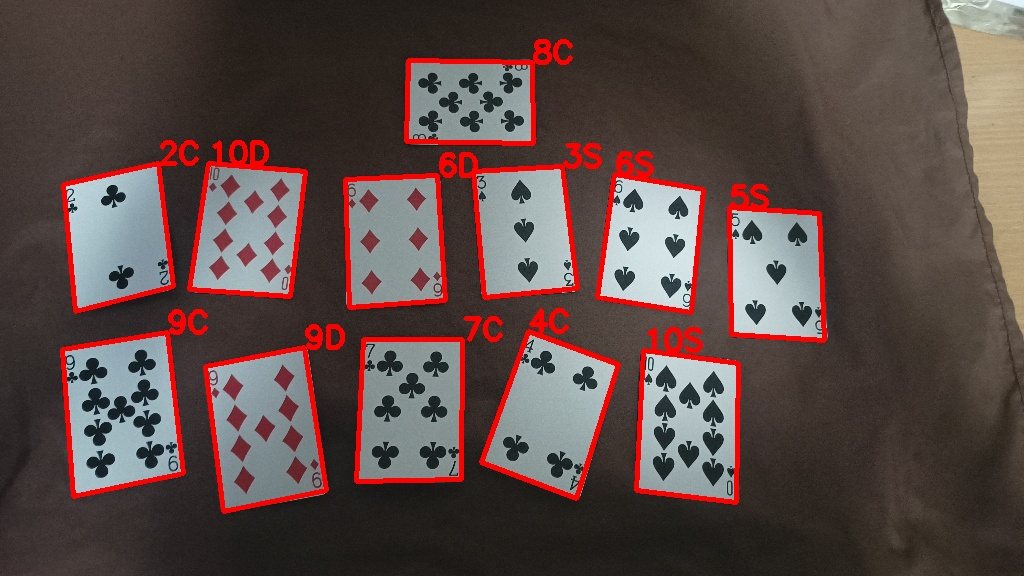

In [11]:
filename = '../bicyclecard/images/IMG_20230520_190114760.jpg'
inputImage = cv2.imread(filename)

segmentor = Segmentor()

classifer = Classifier2()
    
st = time.time()
results = segmentor.seg(inputImage)
en = time.time()
print("time:", en - st)

print(len(results))

inputImageMarked = inputImage.copy()
for result in results:
    contour = np.array(result['bbox'])
    cv2.drawContours(inputImageMarked, [contour], 0, (0, 0, 255), 3)
    card_class = classifer.get_class(result['card'])
    cv2.putText(inputImageMarked, card_class, contour[0], cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 0, 255), thickness=3)
    
# Encode image as jpg numpy array
_, buf = cv2.imencode(".jpg", inputImageMarked)
# Draw result
IPython.display.display(IPython.display.Image(data=buf))